#                                      Data Science Intern at LetsGrowMore
###       Task     :     1)Develop A Neural Network That Can Read Handwriting
###        Level   :      ADVANCED LEVEL TASK
###        Batch  :      August 2k22
###        Author:      Akash Dandge

In [1]:
#importing required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Loading the dataset in (train and test)

Dataset:https://en.wikipedia.org/wiki/MNIST_database

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

### plotting count plot

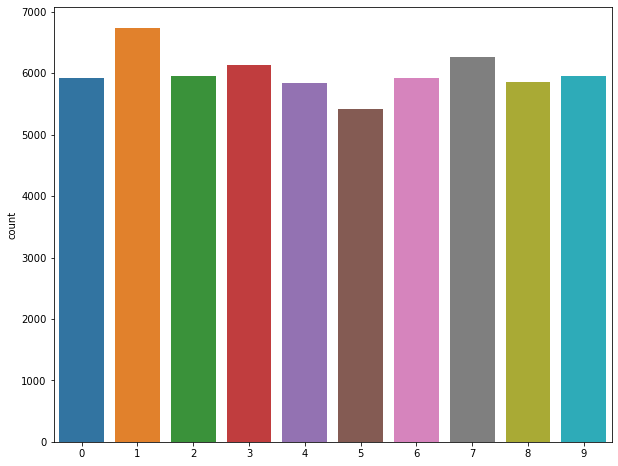

In [3]:
plt.figure(figsize = (10,8))
sns.countplot(y_train)
plt.show()

### Display some sample images from dataset

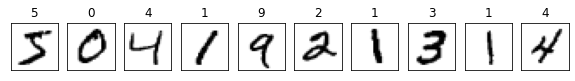

In [4]:
fig, axes = plt.subplots(ncols=10, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray_r')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

### Data pre-processing

In [5]:
print('Training images shape : ',x_train.shape)
print('Testing images shape : ',x_test.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [6]:
#reshape (train and test)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [7]:
x_train=x_train/255.0
x_testg=x_test/255.0
num_classes = 10

### Modal Creation

In [8]:
#required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [9]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3),
                 activation=tf.nn.relu,
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation=tf.nn.softmax))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 26, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0

### Train the modal

In [11]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history=model.fit(x=x_train,
                  y=y_train,
                  validation_split=0.1,
                  epochs=10)

Epoch 1/10
1688/1688 [==============================] - 909s 534ms/step - loss: 0.2666 - accuracy: 0.9232 - val_loss: 0.0980 - val_accuracy: 0.9773
Epoch 2/10
1688/1688 [==============================] - 844s 500ms/step - loss: 0.1081 - accuracy: 0.9679 - val_loss: 0.1047 - val_accuracy: 0.9823
Epoch 3/10
1688/1688 [==============================] - 797s 472ms/step - loss: 0.0885 - accuracy: 0.9738 - val_loss: 0.1104 - val_accuracy: 0.9823
Epoch 4/10
1688/1688 [==============================] - 723s 428ms/step - loss: 0.0741 - accuracy: 0.9783 - val_loss: 0.1223 - val_accuracy: 0.9800
Epoch 5/10
1688/1688 [==============================] - 705s 418ms/step - loss: 0.0681 - accuracy: 0.9798 - val_loss: 0.0794 - val_accuracy: 0.9873
Epoch 6/10
1688/1688 [==============================] - 699s 414ms/step - loss: 0.0601 - accuracy: 0.9826 - val_loss: 0.1635 - val_accuracy: 0.9798
Epoch 7/10
1688/1688 [==============================] - 687s 407ms/step - loss: 0.0515 - accuracy: 0.9853 - val_

### Evaluating the modal

In [12]:
loss_and_acc=model.evaluate(x_test,y_test)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 [==============================] - 40s 127ms/step - loss: 2.4890 - accuracy: 0.9897
Test Loss 2.488966703414917
Test Accuracy 0.9897000193595886


### Plotting Training & Validation plots

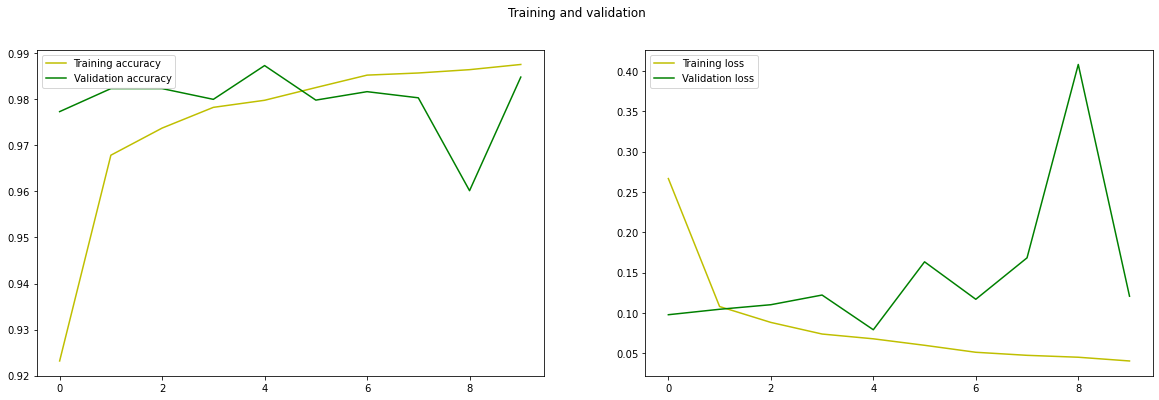

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

### Confusion matrix

In [14]:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

313/313 [==============================] - 28s 87ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 975,    0,    2,    0,    0,    0,    1,    0,    2,    0],
       [   0, 1126,    2,    1,    0,    2,    3,    1,    0,    0],
       [   1,    1, 1030,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    2,  999,    0,    5,    0,    1,    3,    0],
       [   0,    0,    0,    0,  979,    0,    1,    0,    1,    1],
       [   0,    1,    2,    4,    0,  878,    1,    1,    4,    1],
       [   2,    1,    0,    0,    1,    4,  942,    0,    8,    0],
       [   0,    3,    5,    2,    0,    0,    0, 1016,    1,    1],
       [   1,    0,    2,    1,    0,    0,    0,    0,  969,    1],
       [   1,    0,    2,    1,    9,    3,    0,    4,    6,  983]])>

### Heat map

Text(69.0, 0.5, 'Truth')

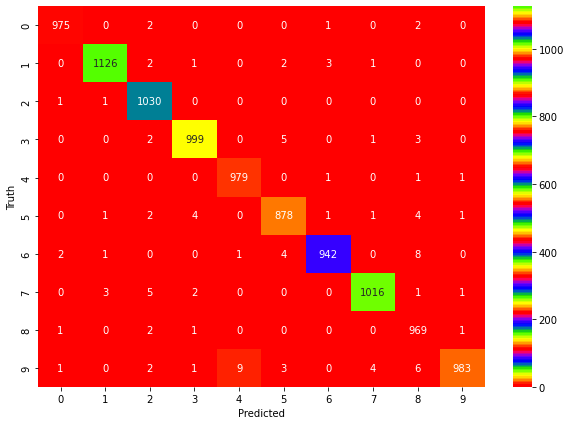

In [15]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'prism')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Testing the Modal

In [16]:
def test_m(n):
    plt.imshow(x_test[n],cmap='gray_r')
    plt.title('Actual Value: {}'.format(y_test[n]))
    prediction=model.predict(x_test)

    plt.axis('off')
    print('Predicted Value: ',np.argmax(prediction[n]))
    if(y_test[7]==(np.argmax(prediction[n]))):
      print('Successful prediction')
    else:
      print('Unsuccessful prediction')

313/313 [==============================] - 31s 94ms/step
Predicted Value:  9
Successful prediction


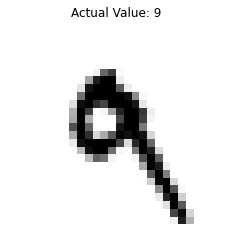

In [20]:
test_m(7)

313/313 [==============================] - 28s 89ms/step
Predicted Value:  1
Unsuccessful prediction


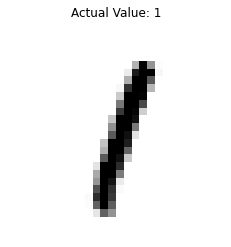

In [21]:
test_m(5)

313/313 [==============================] - 27s 85ms/step
Predicted Value:  4
Unsuccessful prediction


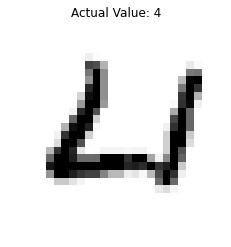

In [24]:
test_m(33)